# Exercises

## Titanic

### Import, Load, Prep, Explore, and Viz

In [1]:
import acquire as a
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Makes the output columns not truncate (100 = maximum columns to display)
pd.set_option('display.max_columns', 100) 

# Makes the output columns not linebreak
pd.set_option('display.expand_frame_repr', False)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold

In [2]:
# Changing these too often to do a .py import.

def split_data(df, target):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on a specified variable.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=0.2, random_state=123, stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=123, stratify=train_validate[target])
    print(f'train: {len(train)} ({round(len(train)/len(df), 2)*100}% of {len(df)})')
    print(f'validate: {len(validate)} ({round(len(validate)/len(df), 2)*100}% of {len(df)})')
    print(f'test: {len(test)} ({round(len(test)/len(df), 2)*100}% of {len(df)})')
    return train, validate, test

    
def prep_titanic(df):
    '''
    This function will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'], fill missing embark_town with 'Southampton'
    and create dummy vars from sex and embark_town. 
    '''
    df = df.drop_duplicates()
    dummy_df = pd.get_dummies(df['sex'], drop_first=True, dtype='int')
    df = pd.concat([df, dummy_df], axis=1)
    df['embark_town'] = df['embark_town'].fillna(value='Southampton')
    dummy_df = pd.get_dummies(df['embark_town'], drop_first=False, dtype='int')
    df = pd.concat([df, dummy_df], axis=1)
    df = df.drop(columns=['pclass', 'deck', 'embarked', 'class', 'age', 'sex', 'embark_town', 'passenger_id'])

    return df

In [3]:
titanic = a.get_titanic_data()

titanic = prep_titanic(titanic)

print(titanic.shape)

(891, 9)


In [4]:
train, validate, test = split_data(titanic, 'survived')

train: 498 (56.00000000000001% of 891)
validate: 214 (24.0% of 891)
test: 179 (20.0% of 891)


### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [5]:
train['survived'].value_counts()

survived
0    307
1    191
Name: count, dtype: int64

In [6]:
print(f"Baseline Accuracy for going down with the ship: {round((train['survived'] == 0).mean(), 2)}")

Baseline Accuracy for going down with the ship: 0.62


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [7]:
# Create X & y version of train, validate, test where y is a series with just the target variable and X are all the features. 

# We'll do exploration and train our model on the train data
X_train = train.drop(columns=['survived'])
y_train = train['survived']

# We tune our model on validate, since it will be out-of-sample until we use it. 
X_validate = validate.drop(columns=['survived'])
y_validate = validate['survived']

# Keep the test separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.
X_test = test.drop(columns=['survived'])
y_test = test['survived']

In [8]:
clf1 = DecisionTreeClassifier(max_depth=5)

In [9]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [10]:
clf1.score(X_train, y_train)

0.8353413654618473

In [11]:
clf1.predict(X_train)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
y_predication = pd.DataFrame({'y_act': y_train, 'baseline': 0, 'model_1': clf1.predict(X_train)})

In [13]:
y_predication

,y_act,baseline,model_1
583,0,0,0
165,1,0,0
50,0,0,0
259,1,0,1
306,1,0,1
...,...,...,...
313,0,0,0
636,0,0,0
222,0,0,0
485,0,0,0


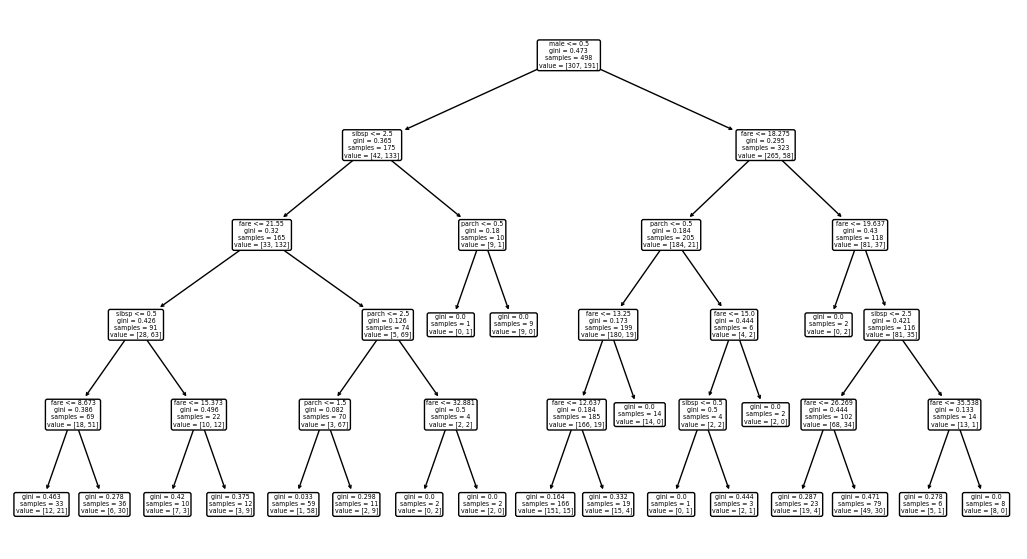

In [14]:
plt.figure(figsize=(13, 7))
plot_tree(clf1, feature_names=X_train.columns.to_list(), rounded=True)
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [15]:
print(f'CLF Score: {clf1.score(X_train, y_train)}')
print(f'Accuracy Score: {accuracy_score(y_predication.y_act, y_predication.model_1)}')

CLF Score: 0.8353413654618473
Accuracy Score: 0.8353413654618473


In [16]:
confusion = confusion_matrix(y_predication['y_act'], y_predication['model_1'])
print(confusion)

TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)
print('True Positive:', TP)

[[283  24]
 [ 58 133]]
True Negative: 283
False Positive: 24
False Negative: 58
True Positive: 133


In [17]:
pd.DataFrame(classification_report(y_predication.y_act, y_predication.model_1, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.829912,0.847134,0.835341,0.838523,0.836517
recall,0.921824,0.696335,0.835341,0.809080,0.835341
f1-score,0.873457,0.764368,0.835341,0.818912,0.831617
support,307.000000,191.000000,0.835341,498.000000,498.000000


### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [18]:
def calculate_metrics(TP, FP, FN, TN):
    '''
    Calculate various classification metrics given true positives, false positives, false negatives, and true negatives.
    '''
    ALL = TP + FP + FN + TN
    acc = (TP + TN) / ALL
    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (FN + TP)
    precision = TP / (TP + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)
    support_pos = TP + FN
    support_neg = FP + TN
    
    metrics_dict = {
    'accuracy': acc,
    'true_positive_rate': TPR,
    'false_positive_rate': FPR,
    'true_negative_rate': TNR,
    'false_negative_rate': FNR,
    'precision': precision,
    'f1_score': f1_score,
    'support_positive': support_pos,
    'support_negative': support_neg}
    
    metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['value'])
    
    return metrics_df

metrics1 = calculate_metrics(TP, FP, FN, TN)

print(metrics1)

                          value
accuracy               0.835341
true_positive_rate     0.696335
false_positive_rate    0.078176
true_negative_rate     0.921824
false_negative_rate    0.303665
precision              0.847134
f1_score               0.764368
support_positive     191.000000
support_negative     307.000000


### 5. Run through steps 2-4 using a different max_depth value.



#### 5.2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [19]:
clf2 = DecisionTreeClassifier(max_depth=10)

In [20]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [21]:
clf2.predict(X_train)

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [22]:
y_predication = pd.DataFrame({'y_act': y_train, 'baseline': 0, 'model_1': clf2.predict(X_train)})

[Text(0.612782579787234, 0.9545454545454546, 'male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(0.45894281914893614, 0.8636363636363636, 'sibsp <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(0.39128989361702127, 0.7727272727272727, 'fare <= 21.55\ngini = 0.32\nsamples = 165\nvalue = [33, 132]'),
 Text(0.2878989361702128, 0.6818181818181818, 'sibsp <= 0.5\ngini = 0.426\nsamples = 91\nvalue = [28, 63]'),
 Text(0.19281914893617022, 0.5909090909090909, 'fare <= 8.673\ngini = 0.386\nsamples = 69\nvalue = [18, 51]'),
 Text(0.11170212765957446, 0.5, 'fare <= 7.888\ngini = 0.463\nsamples = 33\nvalue = [12, 21]'),
 Text(0.07446808510638298, 0.4090909090909091, 'fare <= 6.99\ngini = 0.384\nsamples = 27\nvalue = [7, 20]'),
 Text(0.06382978723404255, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0851063829787234, 0.3181818181818182, 'Southampton <= 0.5\ngini = 0.355\nsamples = 26\nvalue = [6, 20]'),
 Text(0.0425531914893617, 0.22727272

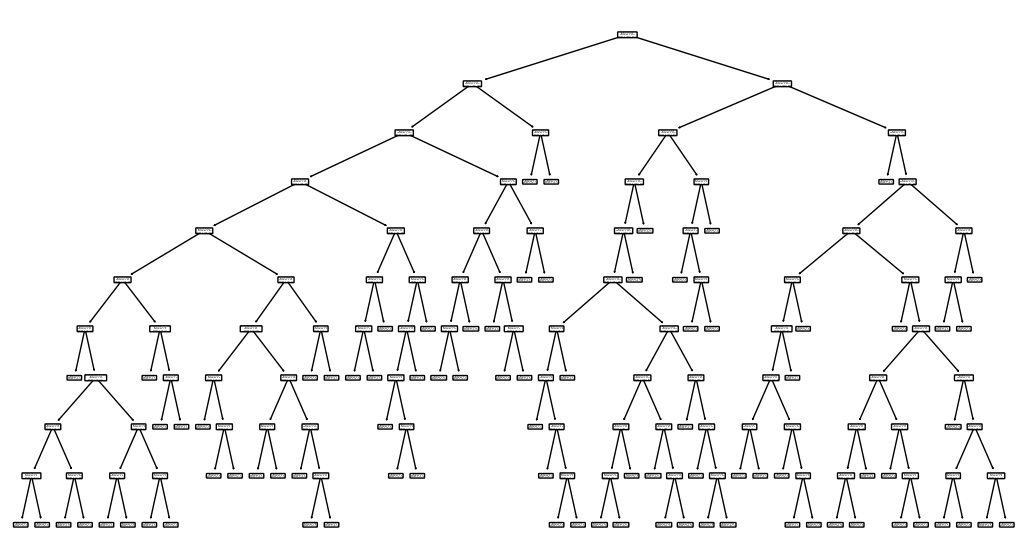

In [23]:
plt.figure(figsize=(13, 7))
plot_tree(clf2, feature_names=X_train.columns.to_list(), rounded=True)

#### 5.3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [24]:
print(f'CLF Score: {clf2.score(X_train, y_train)}')
print(f'Accuracy Score: {accuracy_score(y_predication.y_act, y_predication.model_1)}')

CLF Score: 0.927710843373494
Accuracy Score: 0.927710843373494


In [25]:
confusion = confusion_matrix(y_predication['y_act'], y_predication['model_1'])
print(confusion)

TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)
print('True Positive:', TP)

[[303   4]
 [ 32 159]]
True Negative: 303
False Positive: 4
False Negative: 32
True Positive: 159


In [26]:
pd.DataFrame(classification_report(y_predication.y_act, y_predication.model_1, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.904478,0.975460,0.927711,0.939969,0.931702
recall,0.986971,0.832461,0.927711,0.909716,0.927711
f1-score,0.943925,0.898305,0.927711,0.921115,0.926428
support,307.000000,191.000000,0.927711,498.000000,498.000000


#### 5.4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [27]:
metrics2 = calculate_metrics(TP, FP, FN, TN)

print(metrics2)

                          value
accuracy               0.927711
true_positive_rate     0.832461
false_positive_rate    0.013029
true_negative_rate     0.986971
false_negative_rate    0.167539
precision              0.975460
f1_score               0.898305
support_positive     191.000000
support_negative     307.000000


### 6. Which model performs better on your in-sample data?



In [28]:
# The 10 Depth DT performed better than the 5 Depth DT in all categories.

In [29]:
metrics1 = pd.DataFrame(metrics1)
metrics2 = pd.DataFrame(metrics2)

In [30]:
merged_metrics = metrics1.merge(metrics2, left_index=True, right_index=True)

In [31]:
merged_metrics.rename(columns={'value_x':'5 Depth DT', 'value_y':'10 Depth DT'}, inplace=True)

In [32]:
merged_metrics = round(merged_metrics, 2)

In [33]:
merged_metrics.style.highlight_max(color = 'blue', axis=1)

,5 Depth DT,10 Depth DT
accuracy,0.840000,0.930000
true_positive_rate,0.700000,0.830000
false_positive_rate,0.080000,0.010000
true_negative_rate,0.920000,0.990000
false_negative_rate,0.300000,0.170000
precision,0.850000,0.980000
f1_score,0.760000,0.900000
support_positive,191.000000,191.000000
support_negative,307.000000,307.000000


In [34]:
print(f'CLF Score (5 Depth): {clf1.score(X_train, y_train)}')
print(f'CLF Score (10 Depth): {clf2.score(X_train, y_train)}')

CLF Score (5 Depth): 0.8353413654618473
CLF Score (10 Depth): 0.927710843373494


In [35]:
# models = []
# model_scores = []
# for i in range(2,10):
#     model_i = DecisionTreeClassifier(max_depth=i)
#     model.fit(X_train, y_train)
#     models.append(model)
#     model_scores.append(model.score(X_train, y_train))

### 7. Which model performs best on your out-of-sample data, the validate set?


In [36]:
# The 5 depth performed better on the validate data set, most likely due to 10 depth being overfit.

In [37]:
print(f'CLF Score (5 Depth): {clf1.score(X_validate, y_validate)}')
print(f'CLF Score (10 Depth): {clf2.score(X_validate, y_validate)}')

CLF Score (5 Depth): 0.7850467289719626
CLF Score (10 Depth): 0.7663551401869159


## Telco

### Prepping Telco

In [1]:
# Import

from prepare import pull_prep_telco
from prepare import check_columns

In [3]:
# Pull prep telco produces a cleaned dataframe without binaries for better labeled visualization

df_telco = pull_prep_telco()

In [4]:
# Check Surface Level

df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   object 
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         6361 non-null   object 
 7   online_security        5517 non-null   object 
 8   online_backup          5517 non-null   object 
 9   device_protection      5517 non-null   object 
 10  tech_support           5517 non-null   object 
 11  streaming_tv           5517 non-null   object 
 12  streaming_movies       5517 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [5]:
# Open with text editor or scrollable element to view all
 
check_columns(df_telco)

gender (2)
Unique Values: ['Female' 'Male']

senior_citizen (2)
Unique Values: ['No' 'Yes']

partner (2)
Unique Values: ['Yes' 'No']

dependents (2)
Unique Values: ['Yes' 'No']

tenure (73)
Unique Values: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

phone_service (2)
Unique Values: ['Yes' 'No']

multiple_lines (2)
Unique Values: ['No' 'Yes' None]

online_security (2)
Unique Values: ['No' 'Yes' None]

online_backup (2)
Unique Values: ['Yes' 'No' None]

device_protection (2)
Unique Values: ['No' 'Yes' None]

tech_support (2)
Unique Values: ['Yes' 'No' None]

streaming_tv (2)
Unique Values: ['Yes' 'No' None]

streaming_movies (2)
Unique Values: ['No' 'Yes' None]

paperless_billing (2)
Unique Values: ['Yes' 'No']

monthly_charges (1585)
Unique Values: [65.6  59.9  73.9  ... 91.75 68.8  67.85]

total_charges (6531

In [2]:
# Make Telco binary

test = pull_prep_telco(binary=True)

test.head(1)

# Make all the add ons with get dummies, then compare all of the 'No internets' to see if they are the same.

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,automatic_payments,tenure (months),tenure (years),total_add_ons
0,0,0,1,1,9,1,0,0,1,0,...,65.6,593.3,0,One year,DSL,mailed check,0,108,1,4


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   int64  
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   int64  
 3   dependents             7043 non-null   int64  
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   int64  
 6   multiple_lines         6361 non-null   Int64  
 7   online_security        5517 non-null   Int64  
 8   online_backup          5517 non-null   Int64  
 9   device_protection      5517 non-null   Int64  
 10  tech_support           5517 non-null   Int64  
 11  streaming_tv           5517 non-null   Int64  
 12  streaming_movies       5517 non-null   Int64  
 13  paperless_billing      7043 non-null   int64  
 14  monthly_charges        7043 non-null   float64
 15  tota

In [5]:
check_columns(test)

gender (2)
Unique Values: [0 1]

senior_citizen (2)
Unique Values: [0 1]

partner (2)
Unique Values: [1 0]

dependents (2)
Unique Values: [1 0]

tenure (73)
Unique Values: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

phone_service (2)
Unique Values: [1 0]

multiple_lines (2)
Unique Values: <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64

online_security (2)
Unique Values: <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64

online_backup (2)
Unique Values: <IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64

device_protection (2)
Unique Values: <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64

tech_support (2)
Unique Values: <IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64

streaming_tv (2)
Unique Values: <IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64

streaming_movies (2)
Unique Values: <Integ

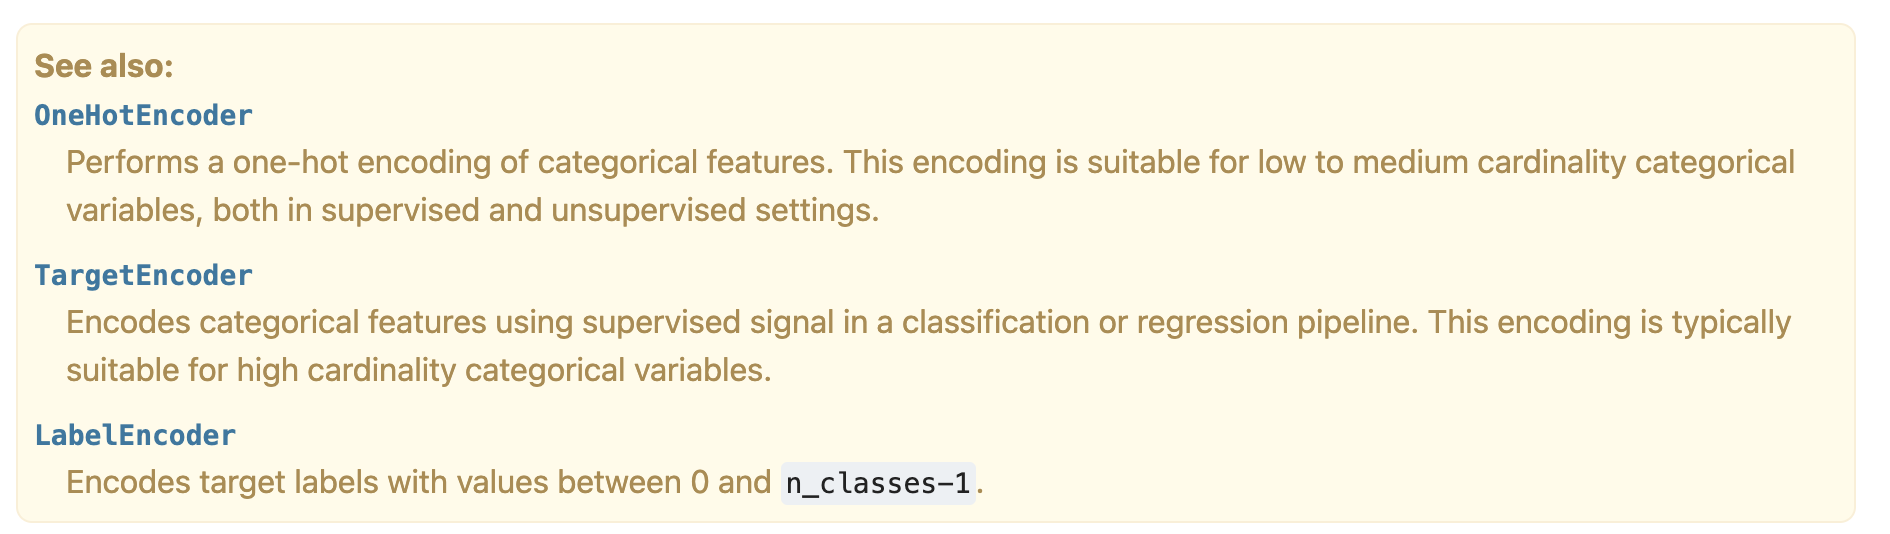

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



### 5. Run through steps 2-4 using a different max_depth value.



### 6. Which model performs better on your in-sample data?



### 7. Which model performs best on your out-of-sample data, the validate set?


# Notes

#### Imports

In [34]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from pydataset import data

# Makes the output columns not truncate (100 = maximum columns to display)
pd.set_option('display.max_columns', 100) 

# Makes the output columns not linebreak
pd.set_option('display.expand_frame_repr', False)

#### Data Set

In [35]:
# read Iris data from pydatset
df = data('iris')

#### Quick Look

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [37]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Clean

In [38]:
# Clean

# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

#### Viz

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

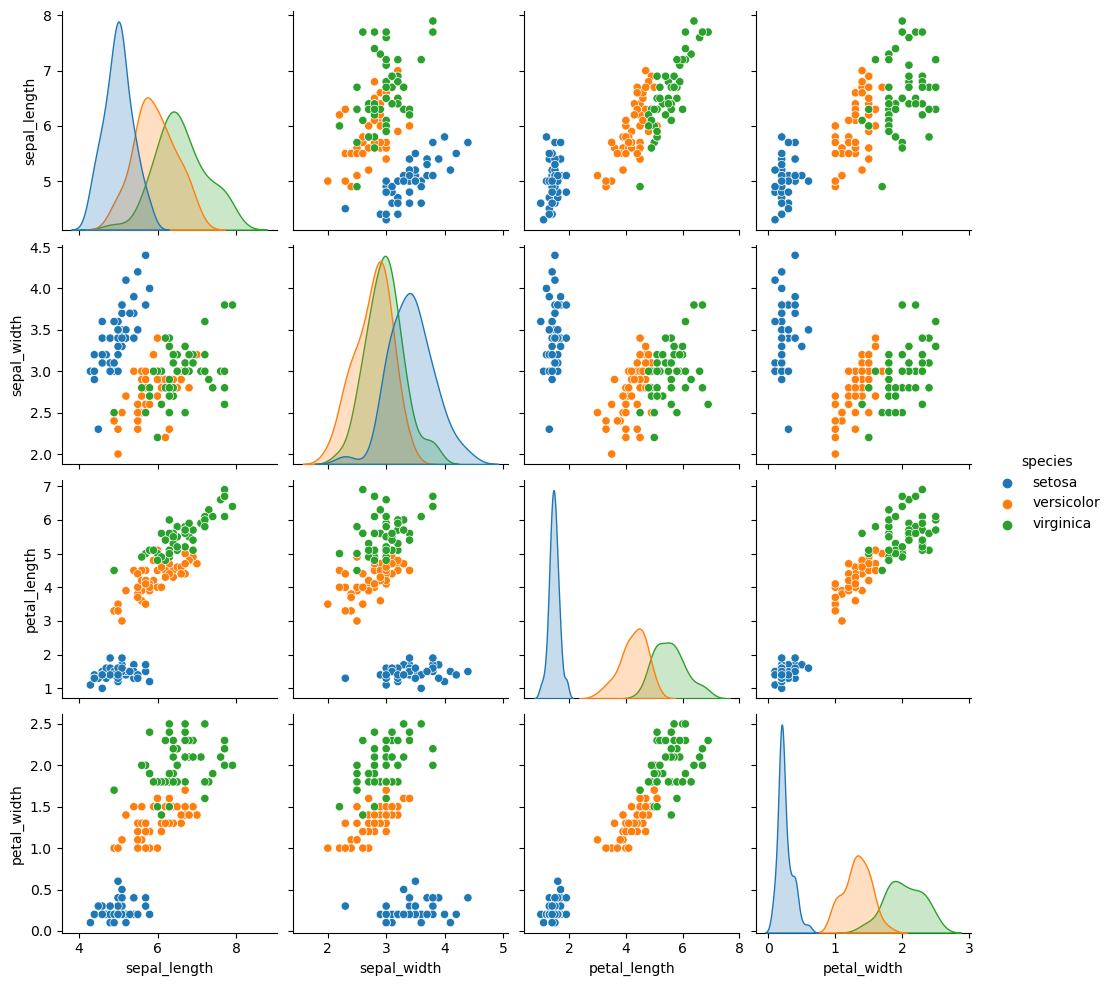

In [40]:
sns.pairplot(data=df, hue='species')

#### Train Validate Test

In [41]:
# Train Validate Test

from sklearn.model_selection import train_test_split

def split_data(df, stratify=None):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on a specified variable.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify])
    
    train, validate = train_test_split(train_validate, 
                                       test_size=.25, 
                                       random_state=123, 
                                       stratify=train_validate[stratify])
    
    print(f'train: {len(train)} ({round(len(train)/len(df), 2)*100}% of {len(df)})')
    print(f'validate: {len(validate)} ({round(len(validate)/len(df), 2)*100}% of {len(df)})')
    print(f'test: {len(test)} ({round(len(test)/len(df), 2)*100}% of {len(df)})')
    
    return train, validate, test

In [42]:
# split into train, validate, test

train, validate, test = split_data(df, stratify='species')

train: 90 (60.0% of 150)
validate: 30 (20.0% of 150)
test: 30 (20.0% of 150)


In [43]:
# Create X & y version of train, validate, test where y is a series with just the target variable and X are all the features. 

# We'll do exploration and train our model on the train data
X_train = train.drop(columns=['species'])
y_train = train['species']

# We tune our model on validate, since it will be out-of-sample until we use it. 
X_validate = validate.drop(columns=['species'])
y_validate = validate['species']

# Keep the test nice and safe and separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.
X_test = test.drop(columns=['species'])
y_test = test['species']

###### Fancy graphic for X and Y splits

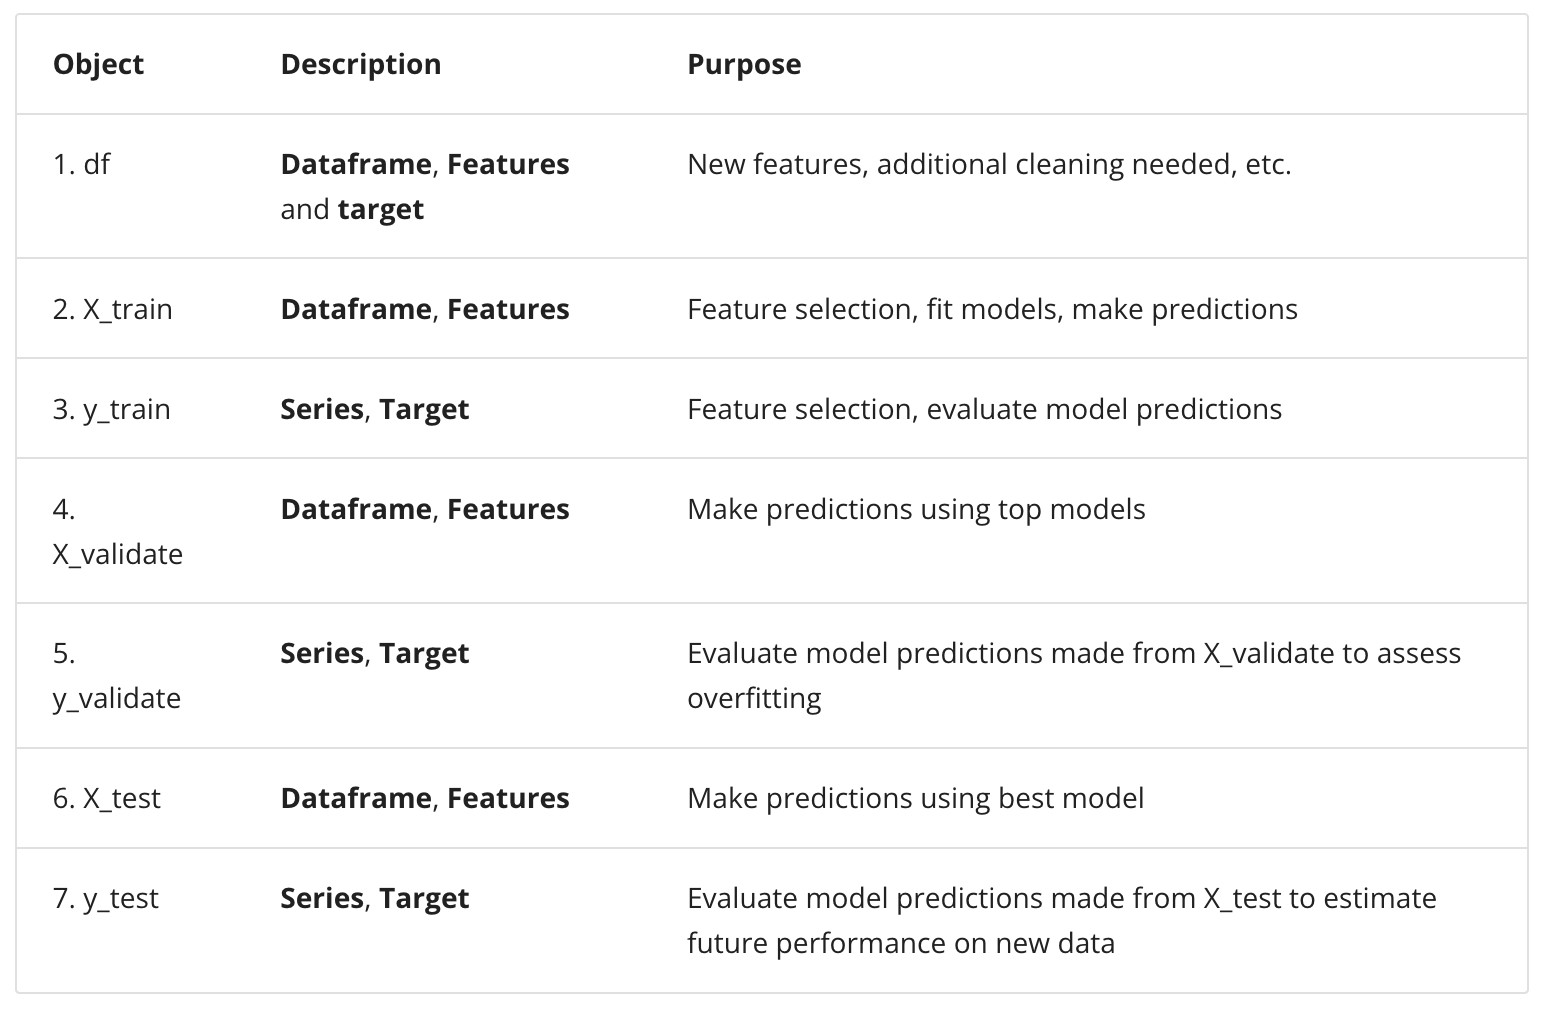

#### Train Model

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

###### Create the object

In [45]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf1 = DecisionTreeClassifier(max_depth=3, random_state=123)

###### Fit the model

In [46]:
# model.fit(X, y)

clf1 = clf1.fit(X_train, y_train)

###### Visualize the tree

###### Make predictions

In [47]:
# make prediction on train obeservations

y_pred = clf1.predict(X_train)
y_pred[0:5]

array(['versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

###### Estimate probability

In [48]:
y_pred_proba = clf1.predict_proba(X_train)
y_pred_proba[0:5]

array([[0. , 0.5, 0.5],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ]])

#### Evaluate Model

###### Compute Accuracy

In [49]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}' .format(clf1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.97


###### Confusion Matrix

In [50]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[30,  0,  0],
       [ 0, 29,  1],
       [ 0,  2, 28]])

In [51]:
y_train.value_counts()

species
versicolor    30
virginica     30
setosa        30
Name: count, dtype: int64

In [52]:
import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,setosa,versicolor,virginica
setosa,30,0,0
versicolor,0,29,1
virginica,0,2,28


###### Classification Report

**Precision:** the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. 
TP
(TP+FP)
 

**Recall:** if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. 
TP
(TP+FN)
 

**f1-score:** The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better. ∈[0,1]

**Support:** number of occurrences of each class in where y is true.

In [53]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        30
  versicolor       0.94      0.97      0.95        30
   virginica       0.97      0.93      0.95        30

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



#### Evaluate with Validate dataset

- Because we didn't do exploration or train on validate, it is "out-of-sample".

- Evaluating on validate means we're learning how well the model does on new data.

In [54]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf1.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



#### Avoid Overfitting

- Obtain more training data (this is always the first answer)

- Feature engineering

- The simplest approach is to set your max_depth argument to a lower integer

- Some other concepts:
    - Use a validate split to ensure we're not overfitting hyperparameters on train
    - Tree pruning
    - Pre-modeling - setting max depth before training your model (or training your model then cranking down the max_depth)
    - Post modeling pruning - go for totally overfit, then then prune that overfit tree. sklearn goes into more detail here